### Notebook for Project2 for Programming for Data Analysis

## An analysis of paleo-present climate data

Phelim Barry

***

## Table of Contents

1. [Introduction](#Introduction)
2. 

In [81]:
# Import Modules
import pandas as pd
import seaborn as sns
import json
import csv
import matplotlib.pyplot as plt
import numpy as np

### CO2 vs Temperatue Anomaly from 800kyrs - present


---

### CO2

### Read in CO2 Data files

In [82]:
# Read Data

# Need to install xlrd to reaad .xls file
# pip install xlrd

# Data from 800000 BC to 2000
ncei_df_col_names = ["year", "CO2", 'sigma']
ncei_df = pd.read_excel("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2.xls", sheet_name="CO2 Composite",skiprows = range(1, 15),names=ncei_df_col_names)

# # Data from 2000 to 2020
gml_df_col_names = ["date", "CO2", 'UNC']
gml_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv",skiprows=44, sep=",", names=gml_df_col_names)

In [83]:
# Reformat the year column and create a new one as date

new_ncei_df = 1950-ncei_df['year']
ncei_df['date'] = new_ncei_df
ncei_df['date'] = ncei_df['date'].astype(int)

In [84]:
ncei_df

,year,CO2,sigma,date
0,-51.030000,368.022488,0.060442,2001
1,-48.000000,361.780737,0.370000,1998
2,-46.279272,359.647793,0.098000,1996
3,-44.405642,357.106740,0.159923,1994
4,-43.080000,353.946685,0.043007,1993
...,...,...,...,...
1896,803925.284376,202.921723,2.064488,-801975
1897,804009.870607,207.498645,0.915083,-802059
1898,804522.674630,204.861938,1.642851,-802572
1899,805132.442334,202.226839,0.689587,-803182


In [85]:
gml_df

,date,CO2,UNC
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12
...,...,...,...
59,2018,408.72,0.12
60,2019,411.65,0.12
61,2020,414.21,0.12
62,2021,416.41,0.12


In [86]:
#gml_df.describe()
# Change the date to datetime rather than object
from datetime import datetime
#gml_df
# pd.to_datetime(gml_df['year'])
#pd.gml_df['year'] = datetime.strptime(gml_df['year'], '%y')

### Plot CO2 Data

<Axes: xlabel='date', ylabel='CO2'>

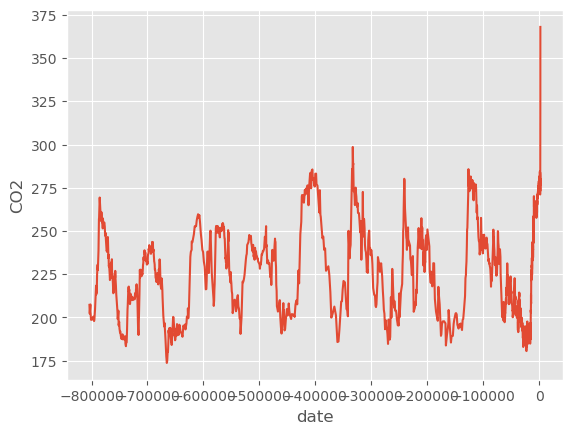

In [87]:
sns.lineplot(data=ncei_df, x='date', y='CO2')

In our first plot we use the data from xxx to plot the CO2 values from 2000 back to 800000 BC. We can see that up to about 1950 the plot is pretty consistent. There are peaks and troughs along the way but values for CO2 generally stay between 175 and 300. However from 1950 through to 2000 the trend is a significant and very sharp increase in CO2 levels.

<Axes: xlabel='date', ylabel='CO2'>

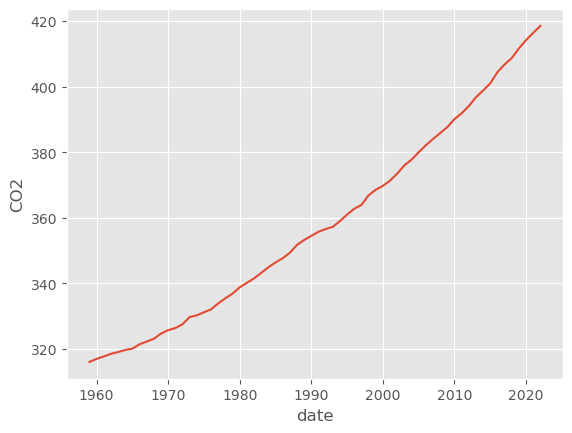

In [88]:
sns.lineplot(data=gml_df, x='date', y='CO2')

In our second plot using data from NOAA we plot the CO2 values from 1959 through to 2020 and can see a steady and consistent rise in CO2 levels.

In [89]:
# ncei_df.head(48)

In [90]:
# gml_df.head(43)

### Combine the data to validate the data is similar for overlapping years

In [91]:
# Extract data for overlapping years

gml_comp_df = gml_df.head(43)
# Reverse the order in the dataframe. From: https://stackoverflow.com/questions/20444087/right-way-to-reverse-a-pandas-dataframe
gml_comp_df.iloc[::-1]
ncei_comp_df = ncei_df.head(48)

In [92]:
#sns.lineplot(data=gml_comp_df, x='year', y='CO2')
#sns.lineplot(data=ncei_comp_df, x='date', y='CO2')

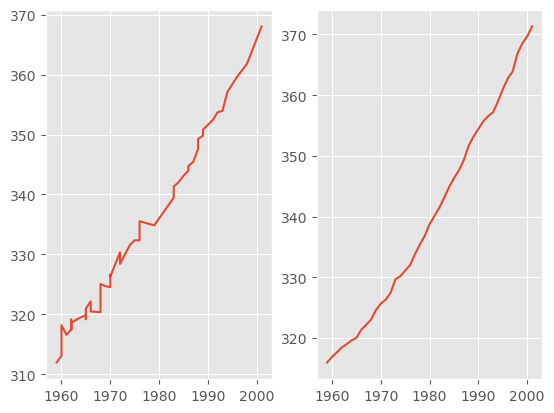

In [93]:
# Combine the plots to validate similar data
# If the data matches then we are good to combine the files for use as our final data file

# Note to self - find a better way to show this
# Combine the raw data and just have 1 plot with two lines - need to fix dates so they match first

figure, (ax1, ax2) = plt.subplots(1, 2)
# data=ncei_comp_df, x='date', y='CO2'
x1 = ncei_comp_df['date']
y1 = ncei_comp_df['CO2']

x2 = gml_comp_df['date']
y2 = gml_comp_df['CO2']

ax1.plot(x1, y1);
ax2.plot(x2, y2);

Analysis of the plots...

When comparing the data from both data sources for the years that overlap (xxxx - yyyy) we can see that from the above plots that the trend is very similar. Both start with readings in the 310s and finish close to 370. Data from (source1) shows a number of dips in the reading as opposed to (source for plot2) which is a much smoother line.
...

From this we can make an assumption that it is OK to combine the plots to give us data to present day...

### Combine CO2 dataframes so as to give -800000 to present day data

ncei data = -800000 to 2001   
gml data = 1959 to 2022

In [94]:
# split out required data

final_ncei_df = ncei_df[['date', 'CO2']] # -800000 to 2001 
final_gml_df = gml_df[['date', 'CO2']].tail(21) # 2002 to 2022
final_gml_df['date'] = gml_df['date'].astype(int)
final_gml_df = final_gml_df.sort_values(by=['date'],ascending=False)

#Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat = [final_gml_df, final_ncei_df]
final_co2_df = pd.concat(dfs_to_concat, ignore_index = True)

#final_co2_df.head (40)



### Complete CO2 plot from 800000 BC to 2022

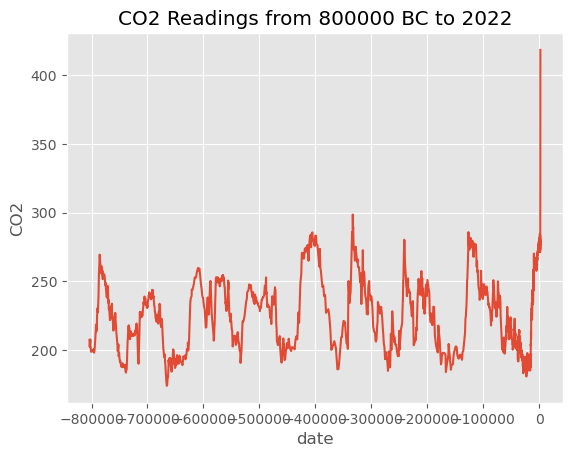

In [95]:
sns.lineplot(data=final_co2_df, x='date', y='CO2').set(title='CO2 Readings from 800000 BC to 2022');

### CO2 plot from 1500 to 2022

To get a clearer picture of when the increase started to happen we reduce the years and start from the 1500s...it all kicked off in the late 1700s which corrospond with the INdustrial Revolution   
***https://en.wikipedia.org/wiki/Industrial_Revolution

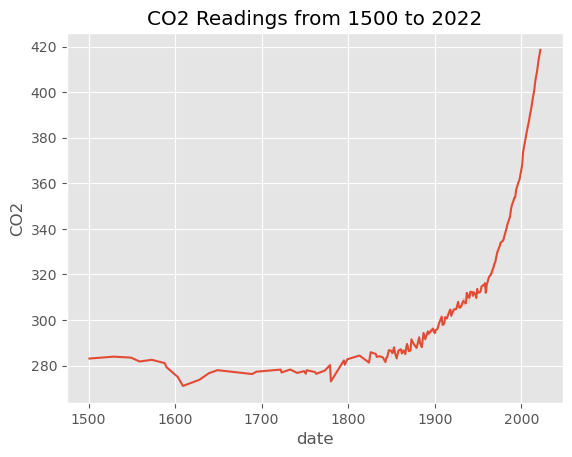

In [96]:
reduced_final = final_co2_df.head(219)

sns.lineplot(data=reduced_final, x='date', y='CO2').set(title='CO2 Readings from 1500 to 2022');

## Temperature

### Import the Temperature/Temperature Anomoly Data


In [97]:
# Read in the data from NOAA source - https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt
# Column 5: Temperature estimate (temperature difference from the average of the last 1000 years)
temp1_col_names = ["bag", "ztop", 'age', 'Deot', 'Temp']
temp1_df = pd.read_csv("https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/epica_domec/edc3deuttemp2007.txt", skiprows = 92, delim_whitespace=True, names=temp1_col_names)


In [98]:
# Clean up the date and headings

new_temp_df2 = 1950-temp1_df['age']
temp1_df['date'] = new_temp_df2
temp1_df['date'] = temp1_df['date'].astype(int)

In [99]:
#temp1_df

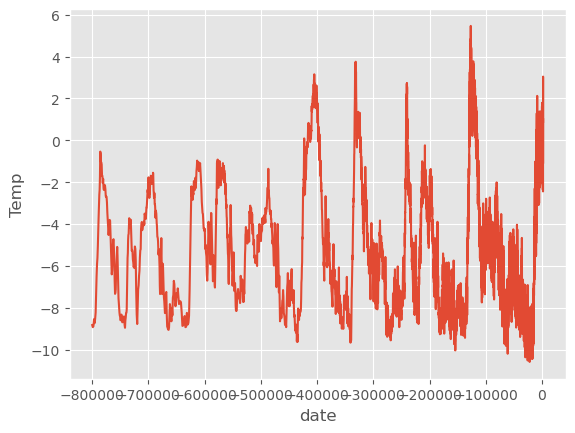

In [100]:
# Plot the Temperature Anomoly Data from -800000 to 2000

sns.lineplot(temp1_df, x='date', y='Temp');

<Axes: xlabel='date', ylabel='Temp'>

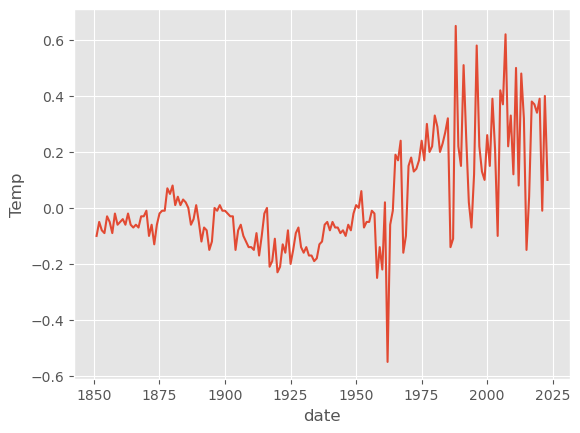

In [101]:
# Import Temperature Anomoly data from 1850 to present
temp2_col_names = ['date', 'Temp']
temp2_df = pd.read_csv("https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/antarctic/land_ocean/12/11/1850-2023/data.csv", skiprows = 5, sep=',', names=temp2_col_names)

sns.lineplot(data=temp2_df, x='date', y='Temp')

In [102]:
# split out required data to combine both datasets
final_temp1_df = temp1_df[['date', 'Temp']] # -800000 to 2000 
final_temp2_df = temp2_df[['date', 'Temp']].tail(23) # 2001 to 2022
final_temp2_df['date'] = final_temp2_df['date'].astype(int)
final_temp2_df = final_temp2_df.sort_values(by=['date'],ascending=False)

# Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat2 = [final_temp2_df, final_temp1_df]
final_df_2 = pd.concat(dfs_to_concat2, ignore_index = True)

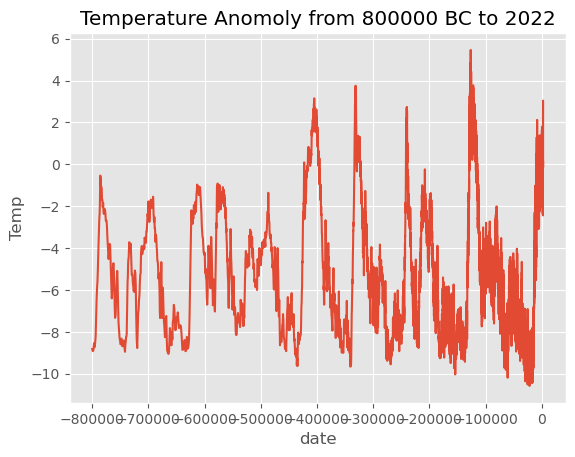

In [103]:
# plot the Temperature Anomoly data for -800000 to 2022 - temperature difference from the average of the last 1000 years
sns.lineplot(data=final_df_2, x='date', y='Temp').set(title='Temperature Anomoly from 800000 BC to 2022');

Cold periods seems to last longer while hot periods are getting hotter...

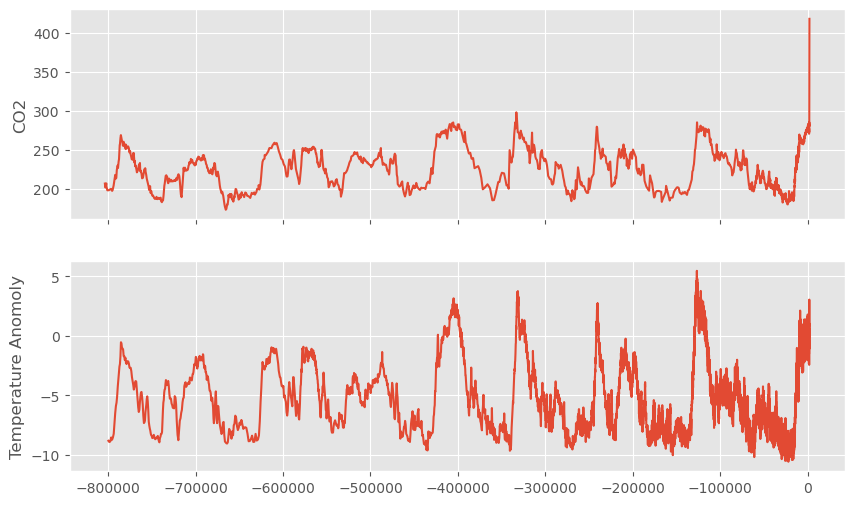

In [104]:
# Plot CO2 v Temperature Anomoly
# Use of ggplot from https://www.geeksforgeeks.org/data-visualization-using-plotnine-and-ggplot2-in-python/
# and https://notebook.community/CommonClimate/teaching_notebooks/GEOL157L/GEOL157_Lab5_paleclimate_records

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomoly');
#ax[0].set_xlabel('Temp Anomoly')
#fig.subplots_adjust(hspace=0)

Analysis of plots

We can see that over the last 800000 years that peaks in the CO2 reading coincides with peaks in Temperature Anomoly...

## CH4

Sources:   
-800000 to 2015 : https://climatechange.chicago.gov/climate-indicators/climate-change-indicators-atmospheric-concentrations-greenhouse-gases   
https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv   


1984 - 2022 : https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt   
from https://gml.noaa.gov/ccgg/trends_ch4/

In [105]:
# Import CH4 data for -800000 to 2015

# Note: due to issues with the file format/encoding of the source data, we use a locally saved copy instead.

ch4_col_names = ['year', 'CH4', 'law', 'cape', 'Mauna', 'Shetlands']
# ch4_df = pd.read_csv("https://climatechange.chicago.gov/sites/production/files/2016-08/ghg-concentrations_fig-2.csv", skiprows = 8, sep = ',', names=ch4_col_names)
ch4_df = pd.read_excel("source_data/CH4_data.xlsm", sheet_name="sheet1",skiprows = range(1, 8),names=ch4_col_names)

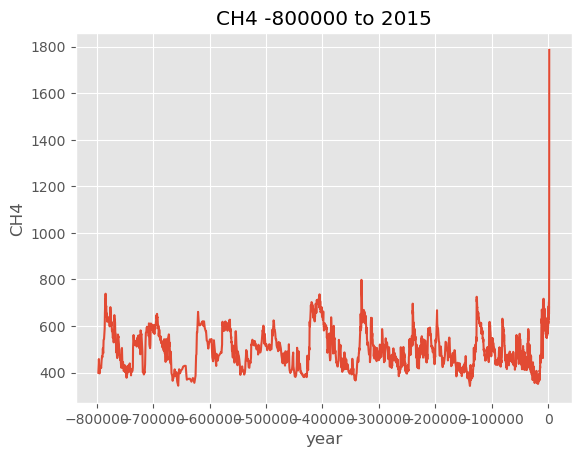

In [106]:
# Fill in the gaps from the other readings
ch4_df.CH4.fillna(ch4_df.law, inplace=True)
ch4_df.CH4.fillna(ch4_df.cape, inplace=True)
ch4_df.CH4.fillna(ch4_df.Mauna, inplace=True)

# Drop row with invalid data: https://stackoverflow.com/questions/60698147/how-to-drop-a-row-using-iloc-method
ch4_df.drop(labels=2175, inplace=True)

# Plot the graph
sns.lineplot(data=ch4_df, x='year', y='CH4').set(title='CH4 -800000 to 2015');


In [107]:
# Import CH4 data for 1984 to 2022

ch4v2_col_names = ['year', 'CH4', 'unc']
ch4v2_df = pd.read_csv("https://gml.noaa.gov/webdata/ccgg/trends/ch4/ch4_annmean_gl.txt", skiprows = 46, delim_whitespace=True, names=ch4v2_col_names)


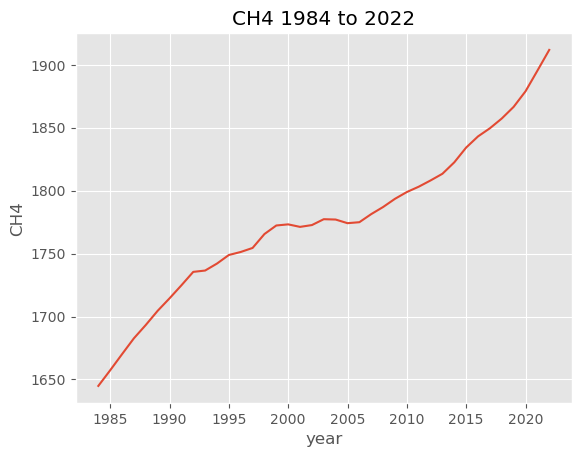

In [108]:
sns.lineplot(data=ch4v2_df, x='year', y='CH4').set(title='CH4 1984 to 2022');

In [109]:
# split out required data to combine both datasets
final_CH4_df = ch4_df[['year', 'CH4']] # -800000 to 2015 
final_CH4_df2 = ch4v2_df[['year', 'CH4']].tail(7) # 2016 to 2022

# Concatenate the two - https://pandas.pydata.org/docs/user_guide/merging.html
dfs_to_concat_ch4 = [final_CH4_df, final_CH4_df2]
final_ch4_df = pd.concat(dfs_to_concat_ch4, ignore_index = True)
#final_ch4_df


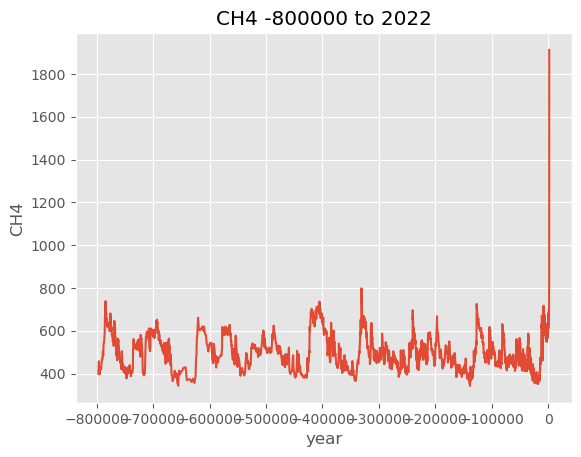

In [110]:
# final_ch4_df = final_ch4_df.astype(int)
sns.lineplot(data=final_ch4_df, x='year', y='CH4').set(title='CH4 -800000 to 2022');

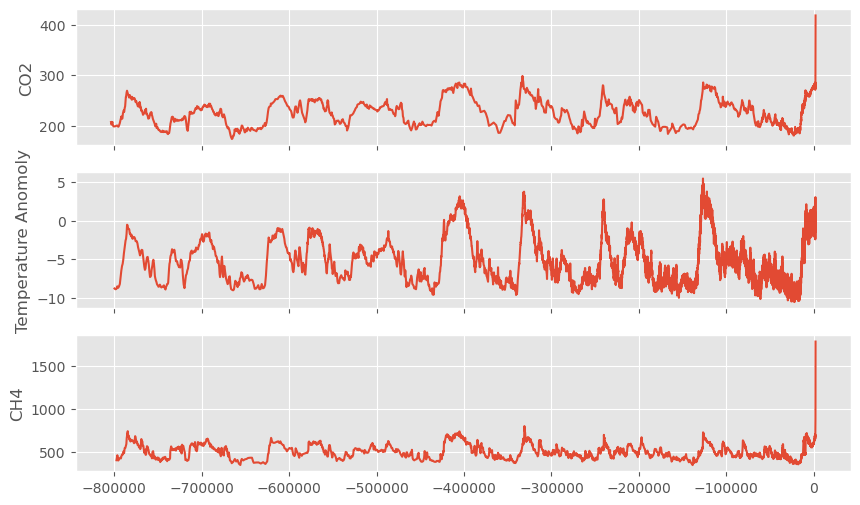

In [111]:

# Plot all three - CO2, Temperature Anomoly and CH4 

plt.style.use('ggplot')
fig, ax = plt.subplots(3,sharex=True,figsize=(10,6))
ax[0].plot(final_co2_df['date'],final_co2_df['CO2'])
ax[0].set_ylabel(r'CO2')

ax[1].plot(final_df_2['date'],final_df_2['Temp'])
ax[1].set_ylabel(r'Temperature Anomoly');

ax[2].plot(ch4_df['year'],ch4_df['CH4'])
ax[2].set_ylabel(r'CH4');

Analysis of plots

We can see ........


---

### Examine Irish Context

Links to Irish Datasets   
https://www.met.ie/climate/available-data/long-term-data-sets/   


Useful Journal Article   
https://www.sciencedirect.com/science/article/pii/S2212094723000610#bib13



---

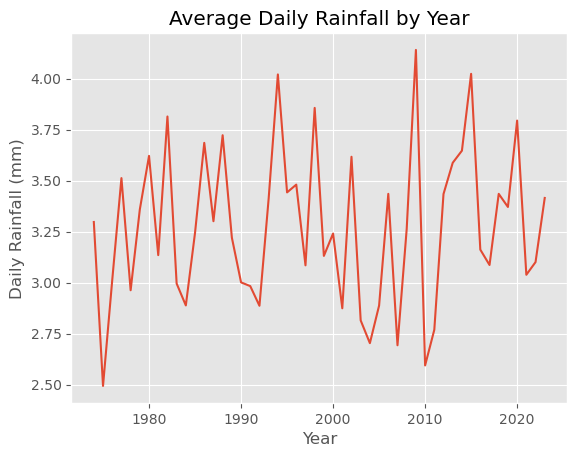

In [112]:
# Read in data
# Data sourced from https://www.met.ie/climate/available-data/historical-data (Sherkin Island)

ir_si_data_col_names = ['date', 'rain', 'maxt', 'mint']
ir_data_si_df = pd.read_csv("source_data/sherkin_island_1972_2023.csv", skiprows = range(0, 745), sep=',', names=ir_si_data_col_names, usecols=[0,2,4,6])

# Convert date field to datetime
ir_data_si_df['date'] = pd.to_datetime(ir_data_si_df['date'])

# Convert date field to period in months
ir_data_si_df['date2'] = ir_data_si_df['date'].dt.to_period('Y')

# Get average rainfall by year/month
df_mean = ir_data_si_df.groupby(['date2'])[['rain']].mean() # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_mean = df_mean.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_mean['date2'] = df_mean['date2'].astype(str)
df_mean['date2'] = pd.to_datetime(df_mean['date2'])

ax = sns.lineplot(data=df_mean, x='date2', y='rain')
ax.set(xlabel='Year',
       ylabel='Daily Rainfall (mm)',
       title='Average Daily Rainfall by Year');


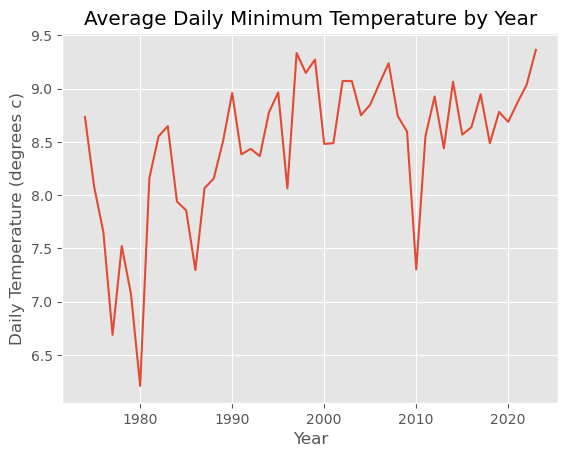

In [113]:
# Get average min temp by year/month

ir_data_si_df["mint"] = pd.to_numeric(ir_data_si_df["mint"], errors='coerce')
df_mint = ir_data_si_df.groupby(['date2'])[['mint']].mean(numeric_only=True) # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_mint = df_mint.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_mint['date2'] = df_mint['date2'].astype(str)
df_mint['date2'] = pd.to_datetime(df_mint['date2'])

ax = sns.lineplot(data=df_mint, x='date2', y='mint');
ax.set(xlabel='Year',
       ylabel='Daily Temperature (degrees c)',
       title='Average Daily Minimum Temperature by Year');

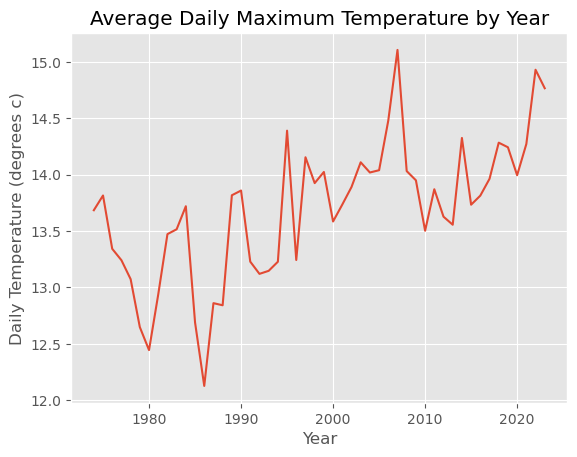

In [114]:
# Get average max temp by year/month

ir_data_si_df["maxt"] = pd.to_numeric(ir_data_si_df["maxt"], errors='coerce')
df_maxt = ir_data_si_df.groupby(['date2'])[['maxt']].mean(numeric_only=True) # https://stackoverflow.com/questions/74578718/pandas-dataframe-column-name-is-oriented-incorrectly
df_maxt = df_maxt.reset_index() 

# Changing datetime from period back to Datetime: https://stackoverflow.com/questions/57580072/changing-period-to-datetime
df_maxt['date2'] = df_maxt['date2'].astype(str)
df_maxt['date2'] = pd.to_datetime(df_maxt['date2'])

ax = sns.lineplot(data=df_maxt, x='date2', y='maxt');
ax.set(xlabel='Year',
       ylabel='Daily Temperature (degrees c)',
       title='Average Daily Maximum Temperature by Year');

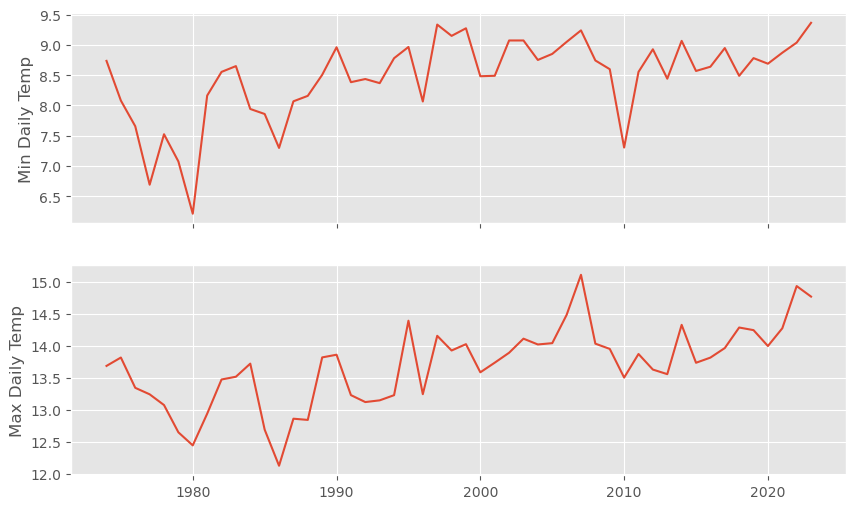

In [115]:
# Compare Average Daily Min and Max Temperatures

plt.style.use('ggplot')
fig, ax = plt.subplots(2,sharex=True,figsize=(10,6))
ax[0].plot(df_mint['date2'],df_mint['mint'])
ax[0].set_ylabel(r'Min Daily Temp')

ax[1].plot(df_maxt['date2'],df_maxt['maxt'])
ax[1].set_ylabel(r'Max Daily Temp');

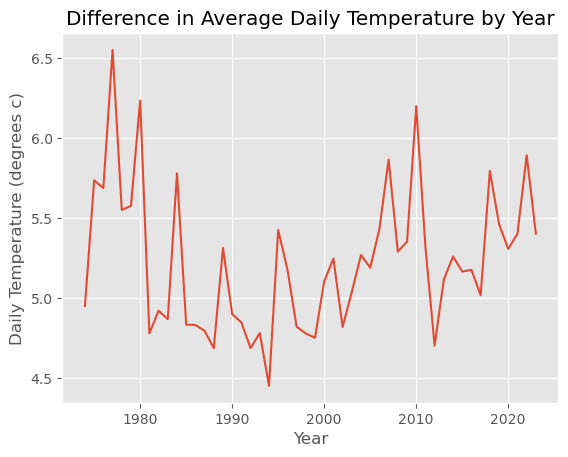

In [116]:
# plot daily difference in temperature

temp_comp = df_mint
temp_comp['maxt'] = df_maxt['maxt']
temp_comp['diff'] = temp_comp['maxt']-temp_comp['mint']

#temp_comp = temp_comp.append(df_mint, df_maxt)

#temp_comp

ax = sns.lineplot(data=temp_comp, x='date2', y='diff');
ax.set(xlabel='Year',
       ylabel='Daily Temperature (degrees c)',
       title='Difference in Average Daily Temperature by Year');

### Fuse and analyse of data from various data sources and Export to csv and json





Create/Export final dataframe to json and csv formats

In [117]:
# Create final dataframe by fusing them together

# Create new df 
very_final_df = final_df_2
very_final_df = very_final_df.rename({'date': 'temp_date', 'Temp': 'temp_anom'}, axis='columns')

# Use inner join with concat: https://sparkbyexamples.com/pandas/pandas-concat-dataframes-explained/
very_final_df= pd.concat([very_final_df, final_co2_df], axis=1, join='inner')
very_final_df = very_final_df.rename({'date': 'co2_date', 'CO2': 'co2_reading'}, axis='columns')

very_final_df= pd.concat([very_final_df, final_ch4_df], axis=1, join='inner')
very_final_df = very_final_df.rename({'year': 'ch4_date', 'CH4': 'ch4_reading'}, axis='columns')

very_final_df= pd.concat([very_final_df, ir_data_si_df], axis=1, join='inner')
very_final_df = very_final_df.drop('date2', axis=1)
very_final_df = very_final_df.rename({'date': 'ir_date', 'rain': 'rainfall','maxt': 'max_temp', 'mint': 'min_temp'}, axis='columns')


In [118]:
# Export final dataframe to csv and json formats

# export to csv
FILENAME = "exports/csv_text.csv"
with open(FILENAME, 'w', newline = '') as f:
    writer = csv.writer(f)
    writer.writerows([
        ['Column Descriptions', None],
        ['----', '----'],
        ['temp_date', 'Date of Temperature Reading'],
        ['temp_anom', 'Temperature Anomoly Value'],
        ['co2_date', 'Date of CO2 Reading'],
        ['co2_reading', 'CO2 Value'],
        ['ch4_date', 'Date of CH4 Reading'],
        ['ch4_reading', 'CH4 Value'],
        ['ir_date', 'Irish Data - Date of Reading'],
        ['rainfall', 'Irish Data - Daily Rainfall Value'],
        ['max_temp', 'Irish Data - Maximum Daily Temperature Value'],
        ['min_temp', 'Irish Data - Mimimun Daily Temperature Value'],
        ['', '']
    ])
very_final_df.to_csv(FILENAME, mode = 'a', index = False) # https://stackoverflow.com/questions/17530542/how-to-add-pandas-data-to-an-existing-csv-file

# json
# note to self - need to find a way to write the header details to json similar to csv above
# check this link - https://stackoverflow.com/questions/13949637/how-to-update-json-file-with-python
FILENAME = "exports/json_text.txt"
very_final_df.to_json(FILENAME, index = True)

### Analysis of all the above data - trends/relationships etc (temporal leads, lags, frequency analysis etc)



---

### Predict global temperature anomaly over next few decades (synthesise data) and compare to pushed climate modles - if atmospheric CO2 trends continue



---

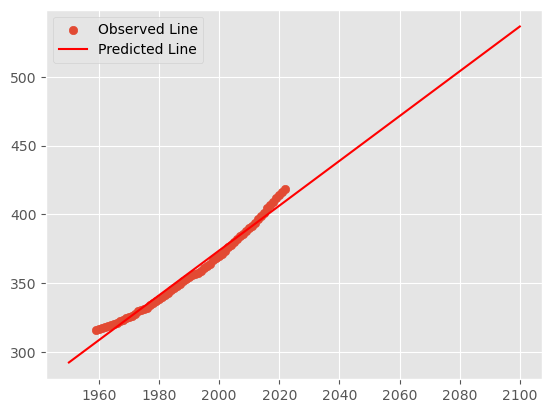

In [119]:
# Some stuff for future predictions

# Reshape/transpose data
# sns.lineplot(data=reduced_final, x='date', y='CO2').set(title='CO2 Readings from 1500 to 2022');
list1 = gml_df['date'].to_numpy() # Convert dataframe to array
list2 = gml_df['CO2'].to_numpy() # Convert dataframe to array
list3 = list1.reshape(-1,1)
list4 = list2.reshape(-1,1)

#linear regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(list3,list4)

import numpy as np
x_test = np.linspace(1950,2100) # Need to decide on dates to use as the whole -800000 wouldn't make sense...
x_testShaped = x_test.reshape(-1,1)

y_testPred = lr.predict(x_testShaped)

plt.scatter(list3,list4)
plt.plot(x_test, y_testPred, 'r')
plt.legend(['Observed Line', 'Predicted Line'])
plt.show()

### Comment on accellerated warming based on very latest features (e.g temperature/polar-ice-coverage)



---

### Appendix/References etc

***

#### End

Notes:

Data Sources
Link to CO2 data -800000 to present+51 (present is 1950)
https://www.ncei.noaa.gov/pub/data/paleo/icecore/antarctica/antarctica2015co2composite.txt   
Taken from https://www.ncei.noaa.gov/access/paleo-search/study/17975

Link to Mauna Loa data 1959 - 2022
https://gml.noaa.gov/webdata/ccgg/trends/co2/co2_annmean_mlo.csv   
Taken from https://gml.noaa.gov/ccgg/trends/data.html

Link to Temperature data...